<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

---

# Projeto - Churn Prediction

Churn rate, ou simplesmente churn, representa a taxa de evasão da sua base de clientes. **Churn é, na verdade, uma métrica que indica o quanto sua empresa perdeu de receita ou clientes.**

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Imagine, que um cliente de sua empresa, que faz o uso de seus serviços com certa frequência, de repente deixa de usá-los e abandona a empresa.

Neste momento, ter vários dados sobre os clientes, para conseguir analisá-los e extrair informações valiosas por meio dos insights é um grande diferencial para sua empresa.

Uma das soluções mais eficientes oferecida pelo Big Data, é o **Churn Prediction**. Nesse projeto vamos fazer a análise de um conjunto de dados de uma determinada empresa, para fazer a previsão do abandono do serviço pelo cliente. Esse trabalho é feito por meio do Machine Learning, a partir da análise da rotatividade da base de usuários propensos a desistir do que você oferece ao mercado.

**Ao colocar em prática o conceito de Churn Prediction em sua empresa, será possível criar ações ou campanhas específicas para reter esses clientes e evitar, dessa forma, uma queda no número de conversões e, consequentemente, no faturamento da empresa, além da redução de custos e observação de novas oportunidades com potenciais clientes.**

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíveis, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# importar os pacotes necessários
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise exploratória dos dados

Para esta etapa, vamos realizar alguns comandos a fim de fazer uma análise exploratória completa para conseguirmos entender o conjunto de dados em questão e assim dar prosseguimento a fim de executar o nosso churn prediction da maneira mais eficaz possível.

Serão feitos os seguintes comandos nessa análise exploratória:
* Verificar os tipos das varíaveis e valores ausentes;
* Verificar o resumo estatístico do dataframe;
* Ver a quantidade de valores ausentes;
* Ver a porcentagem de valores ausentes;
* Analisar as entradas de cada variável;
* Plotar um gráfico de barras para ver o balanceamento do dataset;
* Plotar um boxplot para analisar outliers;
* Estudar a correlação entre as variáveis.


In [2]:
# Analisar os tipos das varíaveis e ver os valores ausentes nas células
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Verificar o conjunto estatístico do dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Quantidade de valores ausentes
df.isnull().sum

<bound method DataFrame.sum of       customerID  gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges  Churn
0          False   False          False  ...           False         False  False
1          False   False          False  ...           False         False  False
2          False   False          False  ...           False         False  False
3          False   False          False  ...           False         False  False
4          False   False          False  ...           False         False  False
...          ...     ...            ...  ...             ...           ...    ...
7038       False   False          False  ...           False         False  False
7039       False   False          False  ...           False         False  False
7040       False   False          False  ...           False         False  False
7041       False   False          False  ...           False         False  False
7042       False   False          False  ...           False       

In [5]:
# Porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [6]:
# Verificar as entradas presentes em cada variável
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
9995-HOTOH  Male    0              Yes      Yes         63      No            No phone service  DSL              Yes                  Yes                  Yes                  No                   Yes                  Yes                  Two year        No                Electronic check           59.00           3707.6        No       1
3370-HXOPH  Female  0              No       No          3       Yes           Yes               Fiber optic      No                   No                   No                   No                   No                   No                   Month-to-month  No                Electronic check           76.10           257.6  

No     5174
Yes    1869
Name: Churn, dtype: int64


[]

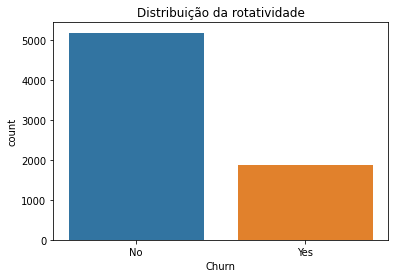

In [7]:
# Balanceamento do dataset
print(df.Churn.value_counts())
fig, ax = plt.subplots()
sns.countplot('Churn', data=df, ax=ax)
ax.set_title('Distribuição da rotatividade')
plt.plot()

Podemos ver que o nosso dataset se encontra um pouco desbalanceado.

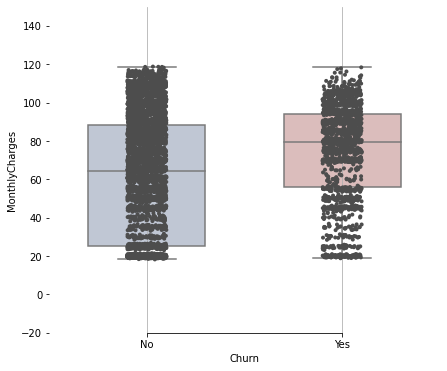

In [8]:
# Plotar bloxplot para a rotatividade
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,whis=[0, 100], width=.6, palette="vlag")
plt.ylim((-20, 150))
sns.stripplot(x="Churn", y="MonthlyCharges", data=df,size=4, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="MonthlyCharges")
sns.despine(trim=True, left=True)

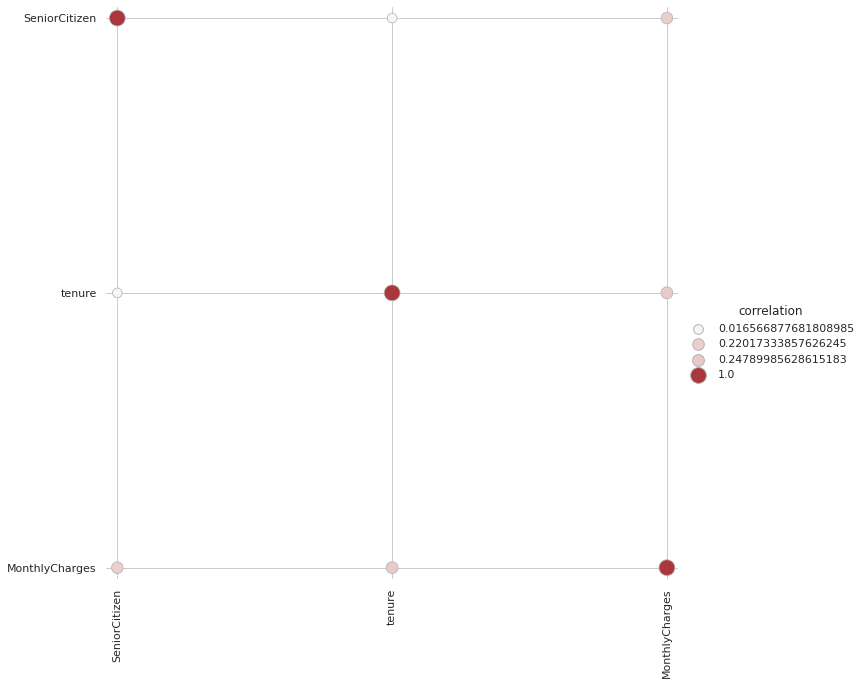

In [9]:
# Estudo da correlação entre as variáveis
sns.set_theme(style="whitegrid")
used_columns = (df.columns)
df = df.loc[:, used_columns]
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Ao passar por toda essa etapa exploratória, conseguirmos perceber que:

* O dataset é composto por 7043 entradas e 21 colunas;
* Temos variáveis do tipo 'object' , 'int' e 'float';
* A variável 'TotalCharges' deveria ser um 'float' e não 'object' como está demonstrado;
* O dataset aparenta não possuir nenhum valor ausente nas suas entradas;
* A maioria das varíaveis do dataset são categóricas (ex. yes or no);
* O dataset se encontra um pouco desbalanceado, pois, podemos perceber muito mais entradas do tipo 'yes' do que 'no' na nossa variável alvo 'Churn';
* O dataset não aparenta possuir outliers, como vimos no método .describe() e no gráfico de boxplot;
* Não foi possível tirar nenhuma conclusão da correlação entre as variáveis, pois, a maioria delas se encontram em formato categórico.

**Neste resumo acima, conseguimos extrair informações extremamente relevantes do dataset em questão. Vamos dar sequência no trabalho fazendo uma preparação e limpeza do nosso dataset, pois, descobrimos diversos pontos que precisam ser tratados no mesmo para, assim, conseguirmos montar um modelo de machine learning.**

## Preparação dos Dados

Nesta etapa vamos focar em fazer os seguintes comandos:

* Criar uma cópia do dataset original;
* Eliminar colunas que não contém informações úteis;
* Alterar a varíavel 'TotalCharges' de 'object' para 'float';
* Alterar as variáveis categóricas para numéricas;
* Balancear o conjunto de dados;
* Dividir o conjunto de dados entre treino e teste;
* Fazer nova matriz de correlação.

In [10]:
# Criar uma cópia do dataset original
df_clean = df.copy()

# Eliminar colunas que não contém informações úteis
df_clean = df.drop("customerID" , axis=1)

# Alterar a varíavel TotalCharges
df_clean['TotalCharges'] = df_clean['TotalCharges'].str.replace(' ','0').astype(float)

# Verificar o novo dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
# Alterar as variáveis categóricas para numéricas
# Colunas a serem transformadas em binárias
object_cols_bin = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'PaperlessBilling' , 'Churn']

# Criar uma cópia do dataframe e excluir as variáveis não binárias
df_mod = df_clean.copy()

# 1. Transformar as variáveis binárias
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols_bin:
  df_mod[col] = label_encoder.fit_transform(df_mod[col])

#2. Transformar as variáveis não binárias
object_cols_nbin = ['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'Contract' , 'PaymentMethod' , 'StreamingMovies']
df_mod_2 = df_mod[object_cols_nbin]
df_mod_2 = pd.get_dummies(df_mod)

#3. Excluir as colunas não binárias do df_mod
df_mod = df_mod.drop(columns=['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'Contract' , 'PaymentMethod' , 'StreamingMovies'])

#4. Unir os dois dataframes formados
df_final = pd.merge(df_mod , df_mod_2)
df_final.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [12]:
# Dividir o conjunto de dados entre treino e teste
X = df_final.drop("Churn" , axis=1)
y = df_final["Churn"]
X_train , X_test , y_train , y_test = train_test_split(X , y)

1    1454
0    1454
dtype: int64


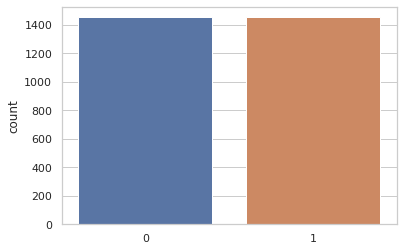

In [13]:
# Balancear o conjunto de dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);

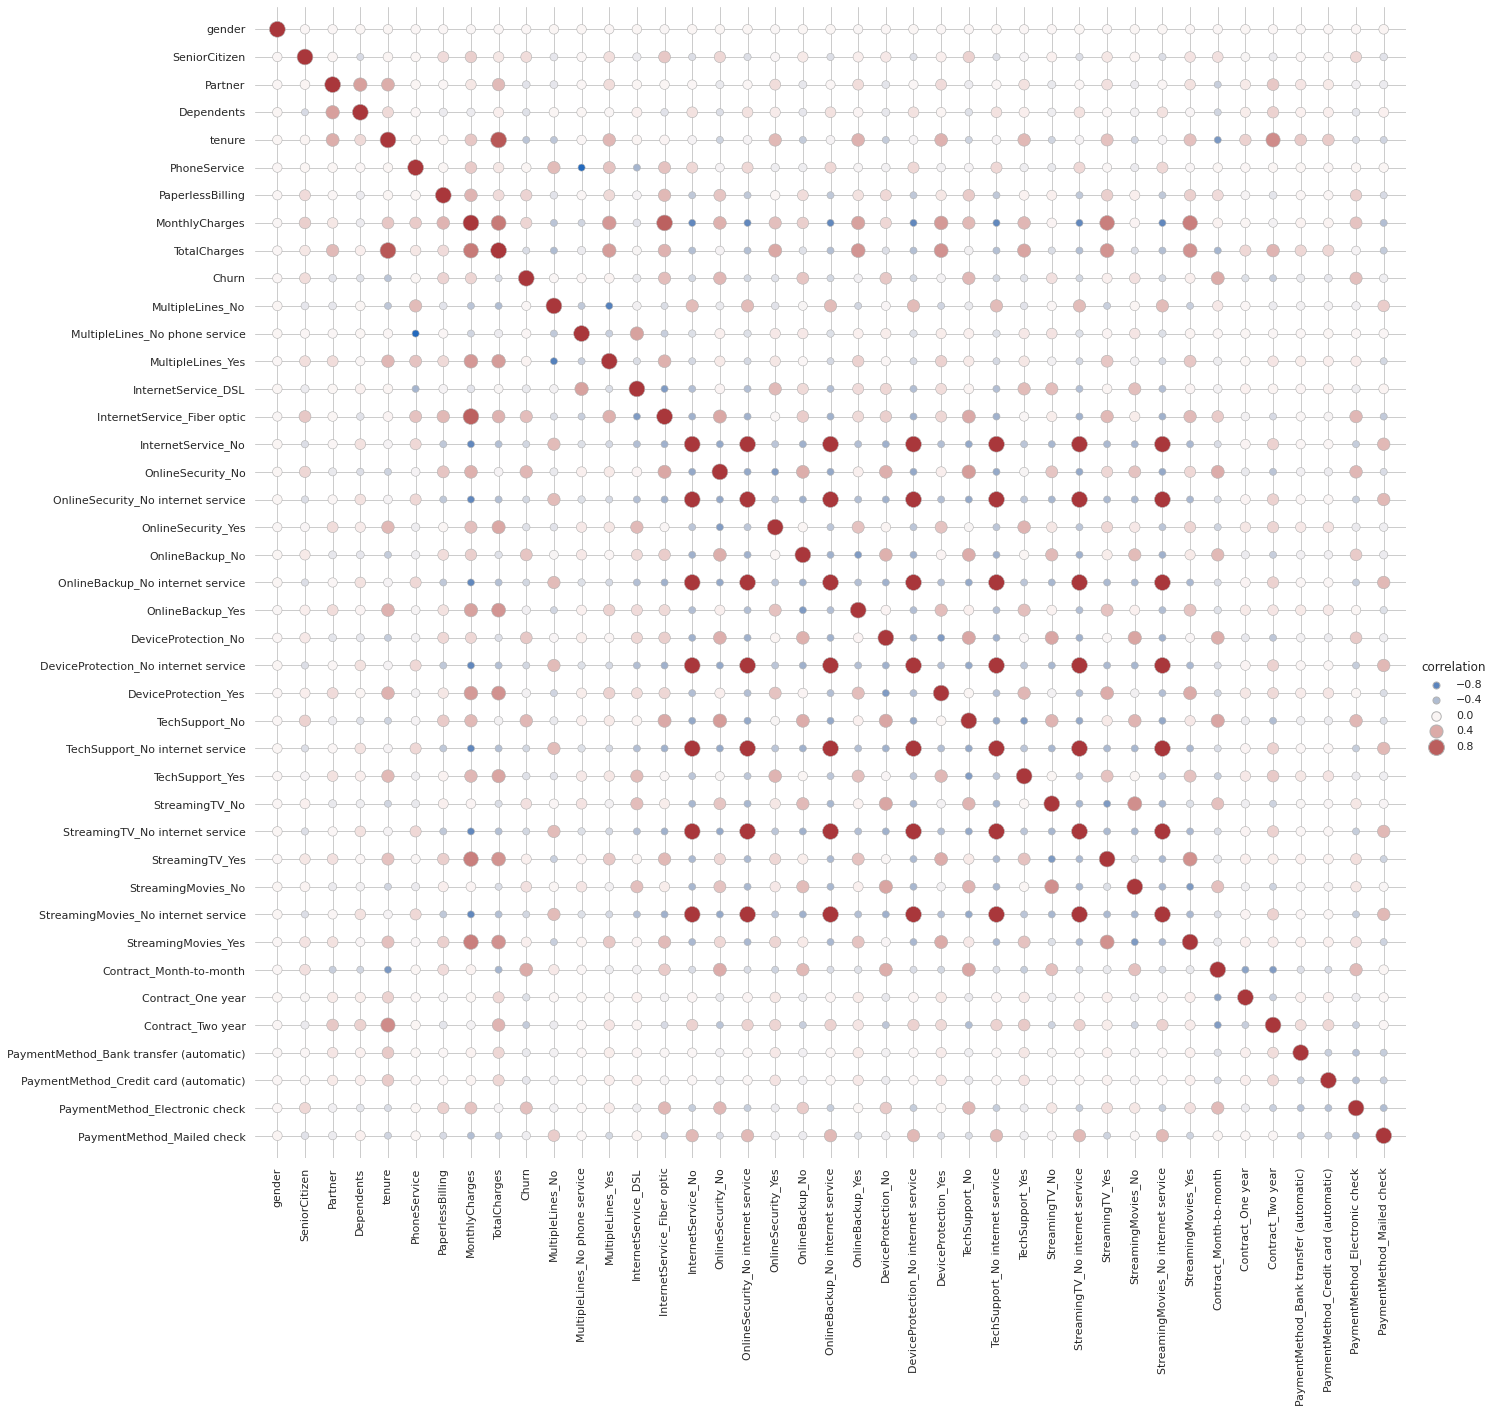

In [14]:
# Plotar nova matriz de correlação
sns.set_theme(style="whitegrid")
used_columns = (df_final.columns)
df_final = df_final.loc[:, used_columns]
corr_mat = df_final.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=20, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

**Nesta etapa de preparação dos dados conseguimos deixar o nosso dataframe pronto e organizado para a próxima etapa, que é executar um modelo de machine learning.**

Gostaria de ressaltar o quanto foi importante as duas etapas feitas acima que foram a análise exploratória e a preparação dos dados. A preparação dos dados só foi possível graças as conclusões que chegamos na análise exploratória e o modelo de machine learning só será possível por causa da etapa de preparação dos dados, sem ela nosso modelo não teria a eficácia que agora ele tem condições de ter.

## Modelo de Machine Learning

Chegamos finalmente na etapa da criação do modelo de machine learning. Nessa etapa a intenção é criar alguns modelos de classificação e compara-los, assim teremos condições de adotar o que tenha uma melhor eficácia.

Vamos adotar os seguintes modelos:

* Random forest;
* Decision tree;
* Stochastic Gradient Descent;
* SVC;
* Regressão Logística;
* XGB
* LightGBM.

Para avaliar os desempenhos do modelo, neste trabalho iremos aplicar a validação cruzada.

In [15]:
# 1. Modelo Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scaler = preprocessing.StandardScaler().fit(X_rus)
X_train_transformed = scaler.transform(X_rus)
clf = make_pipeline(preprocessing.StandardScaler() , RandomForestClassifier())
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7823249692308598

In [16]:
# 2. Modelo decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
clf_2 = make_pipeline(preprocessing.StandardScaler() , DecisionTreeClassifier())
scores_2 = cross_val_score(clf_2, X, y, cv=5)
scores_2.mean()

0.7283950580933145

In [17]:
# 3. Modelo Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
clf_3 = make_pipeline(preprocessing.StandardScaler() , SGDClassifier())
scores_3 = cross_val_score(clf_3, X, y, cv=5)
scores_3.mean()

0.7691546976183605

In [18]:
# 4. Modelo SVC
from sklearn.svm import SVC
svc = SVC()
clf_4 = make_pipeline(preprocessing.StandardScaler() , SVC())
scores_4 = cross_val_score(clf_4, X, y, cv=5)
scores_4.mean()

0.7973111599229741

In [19]:
# 5. Modelo Regressão Logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf_5 = make_pipeline(preprocessing.StandardScaler() , LogisticRegression())
scores_5 = cross_val_score(clf_5, X, y, cv=5)
scores_5.mean()

0.8033337651809147

In [20]:
# 6. Modelo xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
clf_6 = make_pipeline(preprocessing.StandardScaler() , XGBClassifier())
scores_6 = cross_val_score(clf_6, X, y, cv=5)
scores_6.mean()

0.8052949420833505

In [21]:
# 7. Modelo LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
clf_7 = make_pipeline(preprocessing.StandardScaler() , LGBMClassifier())
scores_7 = cross_val_score(clf_7, X, y, cv=5)
scores_7.mean()

0.7900282467577081

Acima, vimos a eficácia de todos os modelos adotados para classificação. Podemos ver que os que alcançaram maior eficácia foram os modelos de regressão logística e XGB. O modelo de XGB ficou na frente por pouco e por isso vamos adota-lo. Além disso o modelo XGB possui uma gama maior de parâmetros que a regressão logística, por exemplo, e com isso é possível melhora-lo ainda mais.

## Otimização do modelo adotado - XGBoost

Antes de executar o modelo preditivo com o XGBoost, vamos tentar otimizar alguns parâmetros. Nesse caso, por ser um modelo de classificação, vamos otimizar alguns parâmetros para o tree booster.

In [22]:
# 1. Identificar melhor parâmetro para 'min_split_loss'
xgb = XGBClassifier(learning_rate=0.3)
param_grid = {'min_split_loss':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8108974964572507 para {'min_split_loss': 8}


In [23]:
# 2. Identificar melhor parâmetro para 'max_depth'
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8)
param_grid = {'max_depth':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8191166745394426 para {'max_depth': 1}


In [24]:
# 3. Identificar melhor parâmetro para 'min_child_weight'
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8 , max_depth=1)
param_grid = {'min_child_weight':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8164052905054323 para {'min_child_weight': 0}


In [25]:
# 4. Identificar melhor parâmetro para 'max_delta_step'
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8 , max_depth=1 , min_child_weight=0)
param_grid = {'max_delta_step':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8163816721776097 para {'max_delta_step': 0}


In [26]:
# 5. Identificar melhor parâmetro para 'reg_lambda'
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8 , max_depth=1 , min_child_weight=0 , max_delta_step=0)
param_grid = {'reg_lambda':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.817699574870099 para {'reg_lambda': 4}


In [27]:
# 6. Identificar melhor parâmetro para 'alpha'
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8 , max_depth=1 , min_child_weight=0 , max_delta_step=0 , reg_lambda=4)
param_grid = {'alpha':range(10)}           
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus , y_rus)
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8191591875295229 para {'alpha': 0}


              precision    recall  f1-score   support

           0       0.97      0.49      0.65      1334
           1       0.39      0.96      0.55       451

    accuracy                           0.61      1785
   macro avg       0.68      0.72      0.60      1785
weighted avg       0.82      0.61      0.62      1785

AUC: 0.7222



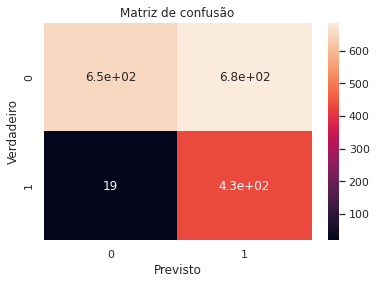

In [28]:
# Modelo final
xgb = XGBClassifier(learning_rate=0.3 , min_split_loss=8 , max_depth=1 , min_child_weight=0 , max_delta_step=0 , reg_lambda=4 , alpha=0)
xgb.fit(X_rus , y_rus)
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)
print(classification_report(y_test , y_pred))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))
# Plotar matriz de confusão
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , ax=ax)
ax.set_title("Matriz de confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")
plt.show()

## Conclusão

O modelo final ficou com um desempenho similar ao que foi feito anteriormente apenas com os dados de treino. É possível, ainda, considerar mais parâmetros no modelo adotado (XGBoost), podendo ser melhorado em uma próxima oportunidade.

Também há espaço para tentar outras técnicas de machine learning.
